0
28
54
80
104
131
156
182
204
232
256
283
311
334
359
384
407
430
453
474
494
515
533
555
576
596
618
638
656
676
695
714
754
772
800
1366
1392
1458


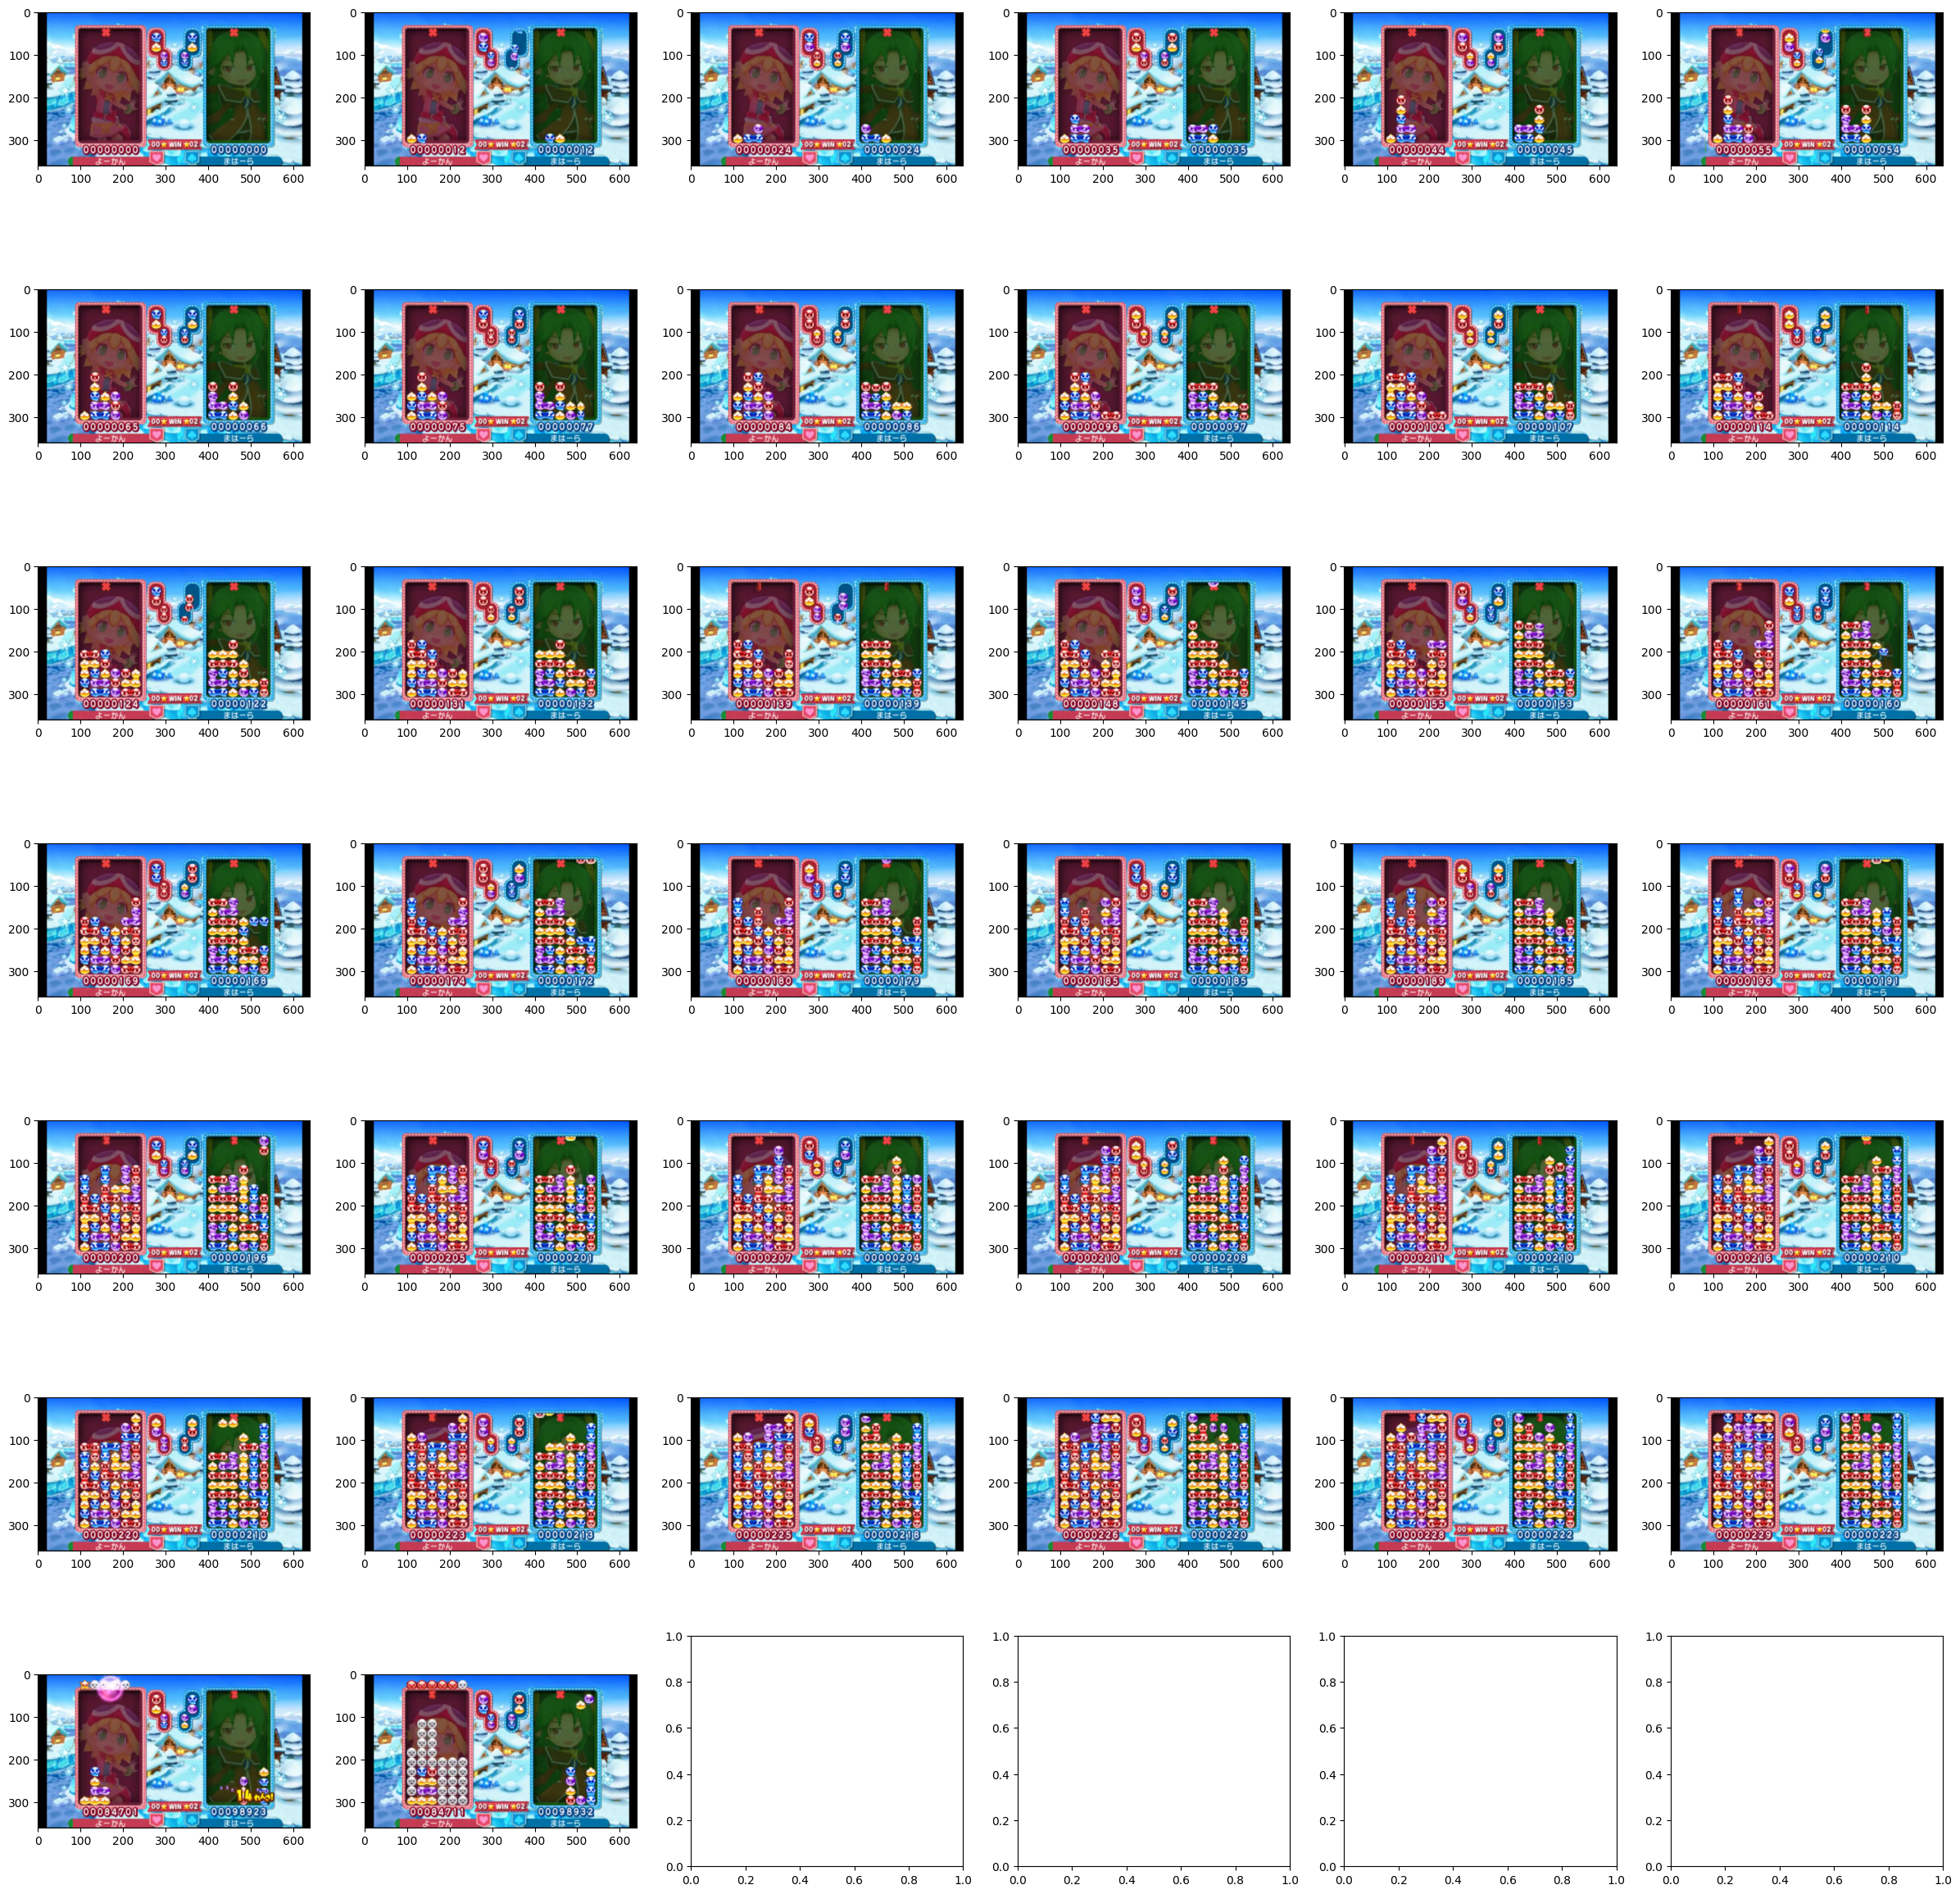

In [20]:
from os import major
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from FieldRecognition import FieldRecognition
from PointChangeRates import PointChangeRates
from TumoChangeRates import TumoChangeRates

point_change_rates = PointChangeRates('./resources/puyo_battle.mp4')
tumo_change_rates = TumoChangeRates('./resources/puyo_battle.mp4')

chain_frame_no_lista = point_change_rates.conversion()
chain_frame_no_list = np.array(chain_frame_no_lista)
tumo_frame_no_list = tumo_change_rates.conversion()

# ぷよを消した瞬間のフレームNo と ツモった瞬間のフレームNo から ぷよを設置した瞬間のフレームを取得する
puyo_setti_frame_no_list = []
for i, tumo_frame_no in enumerate(tumo_frame_no_list):
    if np.any(chain_frame_no_list < tumo_frame_no):
        chain_frame_no = np.amin(chain_frame_no_list)
        puyo_setti_frame_no_list.append(chain_frame_no)
        chain_frame_no_list = chain_frame_no_list[chain_frame_no_list > tumo_frame_no]
    else:
        puyo_setti_frame_no_list.append(tumo_frame_no)
  
# print(puyo_setti_frame_no_list)
# print(len(puyo_setti_frame_no_list))


# 動画読み込み
cap = cv2.VideoCapture("./resources/puyo_battle.mp4")

fps = cap.get(cv2.CAP_PROP_FPS)
w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
sec = frame_count / fps

frame_st = 120
frame_ed = 125

# 動画から画像を抽出
frames = []
while True:
    # generator にしたほうが使いやすい
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
    
row = 7
col = 6
fig, axes = plt.subplots(row, col, figsize=(30, 30), squeeze=False)
for i in range(row):
  for j in range(col):
    if len(puyo_setti_frame_no_list) == 0:
        break
    puyo_setti_frame_no = puyo_setti_frame_no_list.pop(0)
    axes[i,j].imshow(cv2.cvtColor(frames[puyo_setti_frame_no], cv2.COLOR_BGR2RGB))
    #axes[i,j].set_title(f"plot({i}, {j})")
plt.show()